<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px
            ">
<p style="padding: 10px;
          color:red;
          font-size:120%;
          text-align:center;">
 Payam Amanat


</p>

</div>

<center>
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRFvwkNafIcPg0fdrdnXI9JhmA3a1loR9kiTsOsRv5HYYqL5wcaqzbM90fvWLgO9sR0qOU&usqp=CAU' width=800 height=500 />
</center>

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff; text-align:center"><b>Notebook- </b> Abstraction </h2>

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* In this project we will use of different Models of Classification for binary prediction . <br>
* The objective of this project is : <br>

1: Loading dataset<br>
2: EDA<br>
3: Cleaning text<br>
4: Tokenization<br>
5: Lemmatization & Stemmer methods<br>
6: Using both CounterVectorizer and TI-IDF<br>
7: Using classification models<br>
</div>

### Loading necessary libraries

In [4]:
conda install xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /Users/luyuxuan/opt/anaconda3/envs/MedIP

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB
    libxgboost-1.7.3           |       hcec6c5f_0         2.3 MB
    py-xgboost-1.7.3           |   py39hecd8cb5_0         216 KB
    xgboost-1.7.3              |   py39hecd8cb5_0          14 KB
    ------------------------------------------------------------
                                           Total:         2.6 MB

The following NEW packag

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import warnings
import nltk


from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer ,PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

sns.set(style='darkgrid',font_scale=1.5)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.precision', 8)

warnings.filterwarnings('ignore')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Loading Dataset
</p>
</div>

In [6]:
train_df = pd.read_csv("/Users/luyuxuan/Desktop/kaggle/train.csv")
test_df= pd.read_csv("/Users/luyuxuan/Desktop/kaggle/test.csv")

In [7]:
train_df.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Basic Understanding of Dataset
</p>
</div>

### Shape of Train and Test dataset

In [8]:
print(f'Train dataset shape : {train_df.shape}')
print('--'*20)
print(f'Test dataset shape : {test_df.shape}')

Train dataset shape : (7613, 5)
----------------------------------------
Test dataset shape : (3263, 4)


### Features in Train and Test dataset

In [9]:
print(f'Train data : {train_df.columns}')
print('----'*20)
print(f'Test data : {test_df.columns}')

Train data : Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
--------------------------------------------------------------------------------
Test data : Index(['id', 'keyword', 'location', 'text'], dtype='object')


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Exploratory Data Analysis (EDA)
</p>
</div>

### Checking duplicated text for both Train and Test dataset

In [10]:
print('The number of dublicated data in Train dataset :' ,train_df.duplicated(['text']).sum())
print('---'*20)
print('The number of dublicated data in Test dataset : ', train_df.duplicated(['text']).sum())


The number of dublicated data in Train dataset : 110
------------------------------------------------------------
The number of dublicated data in Test dataset :  110


### Removing duplicated texts from both Train and Test dataset

In [11]:
train_df.drop_duplicates(["text", "target"], inplace=True)
test_df.drop_duplicates(["text"], inplace=True)

### Checking dtypes for both Train and Test dataset

In [12]:
print(f'Train features dtypes \n{train_df.dtypes}')
print('-'*20)
print(f'Test features dtypes \n{test_df.dtypes}')

Train features dtypes 
id           int64
keyword     object
location    object
text        object
target       int64
dtype: object
--------------------
Test features dtypes 
id           int64
keyword     object
location    object
text        object
dtype: object


### Missing values in Train dataset

In [13]:
print("Missin values in Train dataset : ")
null_data = train_df.isnull().sum().to_frame().rename(columns={0:'Miss values'})
null_data["Miss values percentage %"] = train_df.isnull().sum() * 100 / len(train_df)
null_data.style

Missin values in Train dataset : 


,Miss values,Miss values percentage %
id,0,0.000000
keyword,56,0.744582
location,2490,33.107300
text,0,0.000000
target,0,0.000000


### Missing values in Test dataset

In [14]:
print("Missin values in Test dataset : ")
null_data = test_df.isnull().sum().to_frame().rename(columns={0:'Miss values'})
null_data["Miss values percentage %"] = round(test_df.isnull().sum() * 100 / len(train_df),2)
null_data.style

Missin values in Test dataset : 


,Miss values,Miss values percentage %
id,0,0.000000
keyword,26,0.350000
location,1097,14.590000
text,0,0.000000


### Showing target feature percentage 

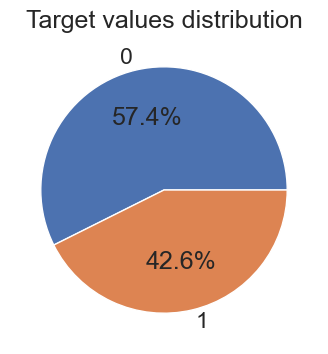

In [15]:
plt.figure(figsize=(6,4))
plt.pie(train_df["target"].value_counts(), labels= train_df["target"].value_counts().keys(),autopct='%1.1f%%')
plt.title('Target values distribution')
plt.show()

### Checking each keywords and their len 

In [16]:
print(f'Train keyword len : {len(train_df.keyword.value_counts(normalize=True))}')
train_df['keyword'].value_counts()

Train keyword len : 221


fatalities               45
deluge                   42
armageddon               42
damage                   41
body%20bags              41
harm                     41
windstorm                40
twister                  40
siren                    40
evacuate                 40
fear                     40
flames                   39
famine                   39
collision                39
earthquake               39
explosion                39
outbreak                 39
sinkhole                 39
sinking                  39
sunk                     39
weapon                   39
weapons                  39
whirlwind                39
collided                 39
wrecked                  39
blaze                    38
upheaval                 38
drowned                  38
thunder                  38
flooding                 38
explode                  38
derailed                 38
fire                     38
bombed                   38
ambulance                38
oil%20spill         

### Checking keywords (disaster or not)

In [17]:
keyword_values=pd.crosstab(train_df['keyword'] , train_df['target'])
keyword_values.sort_values(by=[1,0], ascending=[False,True] )[:20]

target,0,1
keyword,,
outbreak,1,38
debris,0,37
wreckage,0,37
oil%20spill,1,37
typhoon,1,35
derailment,0,33
evacuated,4,32
suicide%20bombing,1,31
nuclear%20disaster,3,31


### Showing Top Ten Keywords (Used)

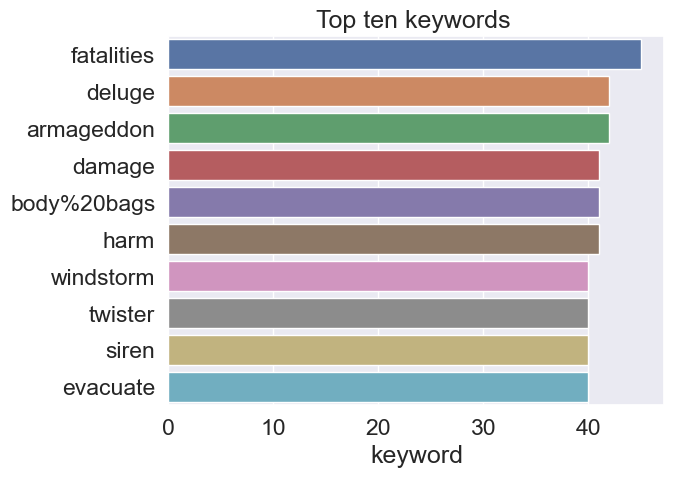

In [18]:
sns.barplot(y=train_df['keyword'].value_counts()[:10].index,x=train_df['keyword'].value_counts()[:10],
            orient='h')
plt.title("Top ten keywords ")
plt.show()

### trimming all locations names

In [19]:
train_df['location'].replace({


                           'New York':'USA',
                           'United States':'USA',
                            "Florida":'USA',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                            "Chicago, IL":'USA',
                            "Chicago":'USA',
                            "San Francisco":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Los Angeles":'USA',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "New York City":'USA',
                            "Atlanta, GA":'USA',
                            "Texas":'USA',

                            "Ireland":'UK',"London, England":'UK',
                            "London, UK":'UK',
                            "London":'UK',
                            "United Kingdom":'UK',

                            "Nigeria":'Africa',
                            "Kenya":'Africa',

                            "Everywhere":'Somewehere',
                            "Earth":'Somewehere', 
                            

                            "Mumbai":"India", 

                            "Toronto":'Canada'

                            },inplace=True)

### Showing Top Ten Locations

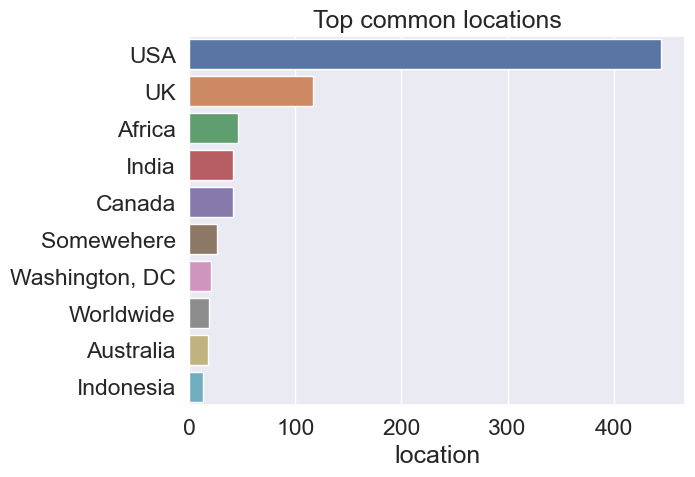

In [20]:
sns.barplot(y=train_df['location'].value_counts()[:10].index , x=train_df['location'].value_counts()[:10] ,orient='h')
plt.title('Top common locations')
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Data Pre-Processing
</p>
</div>

### Cleaning text

In [21]:
def text_cleaner(text):
    
    text=text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text 

train_df['text']=train_df['text'].apply(lambda x :text_cleaner(x))
test_df['text']=test_df['text'].apply(lambda x :text_cleaner(x))

In [22]:
train_df['text'].sample(10)

7142     well im also gay but girls like some too so  ...
2375    temecafreeman gm i pray any attack of the enem...
4587    health fact  of muscle mass is made up of flui...
6721    severe thunderstorm warnings have been cancell...
5051    raì¼l sends a message of condolence to vietnam...
6335    the result of failure in correcting structural...
2198    interesting  aircraft debris found on la reuni...
3003    dust devil maintenance fee  buy up la rotary s...
1839    honestly nightmarish god driving to new places...
2521    free kindle book  aug   thriller  desolation r...
Name: text, dtype: object

In [23]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


### Tokenization process

In [24]:
Tokenizer=RegexpTokenizer(r'\w+')
train_df['text']=train_df['text'].apply(lambda x : Tokenizer.tokenize(x))
test_df['text']=test_df['text'].apply(lambda x : Tokenizer.tokenize(x))

In [25]:
train_df.sample(10)

,id,keyword,location,text,target
2198,3150,debris,"Bristol, UK","[interesting, aircraft, debris, found, on, la,...",1
4476,6366,hostages,china,"[hot, specially, modified, to, land, in, a, st...",0
4202,5965,hazard,USA,"[biggest, lead, hazard, in, new, england, hist...",0
195,274,ambulance,|| c h i c a g o ||,"[when, you, dont, know, which, way, an, ambula...",1
2170,3112,debris,NaN,"[aircraft, debris, found, on, la, reunion, is,...",1
4349,6175,hijack,NaN,"[rickybonessxm, fuck, specially, there, new, s...",0
2108,3027,death,NaN,"[going, to, starve, to, death]",0
4920,7008,mayhem,GLOBAL/WORLDWIDE,"[raynbowaffair, editor, in, chief, diamondkesa...",0
2102,3019,death,NaN,"[rss, judge, orders, texas, to, recognize, spo...",0
6421,9181,suicide%20bomber,NaN,"[bbclaurak, why, is, no, one, talking, about, ...",1


### Downloading momentous packeges

In [26]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/luyuxuan/nltk_data...
[nltk_data] Downloading package punkt to /Users/luyuxuan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/luyuxuan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/luyuxuan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### lemmatization processing and pasting words together

In [27]:

# lemmatizer = WordNetLemmatizer() we can use lemmatizer 
Stemmer = PorterStemmer()
def stopwords_cleaner(text):

    stopwords_list = stopwords.words('english')
    # word = [lemmatizer.lemmatize(letter) for letter in text if letter not in stopwords_list]
    word = [Stemmer.stem(letter) for letter in text if letter not in stopwords_list]
    peasting = ' '.join(word)
    return peasting


train_df['text'] = train_df['text'].apply(lambda x : stopwords_cleaner(x))
test_df['text'] = test_df['text'].apply(lambda x : stopwords_cleaner(x))

In [28]:
train_df['text'].sample(10)

1943                          dont even come worri curfew
4993         peopl die human experi unit japanes militari
6291               dove storm greatest denier electr prom
1163    sioux citi fire offici believ bridg collaps le...
887     enter win entir set butterlondon lip crayon vi...
6382    old pkk suicid bomber deton bomb turkey armi t...
1807             akilah world news cop pull man car avoid
286     rt ourmothermari short readingapocalyps spirit...
7559                           exot car wreck train accid
6194    run siren half hour hotel halfhourhotel edgars...
Name: text, dtype: object

### Using CounterVectorizer on our text

In [29]:
count_vectorizer=CountVectorizer()
train_vectors=count_vectorizer.fit_transform(train_df['text'])

test_vectors = count_vectorizer.transform(test_df["text"])


print(train_vectors[0].todense())

[[0 0 0 ... 0 0 0]]


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model Building 
</p>
</div>

### Spliting data to train and test (CounterVectorizer)

In [143]:
X_train , X_test , y_train , y_test  = train_test_split(train_vectors , train_df['target'] , test_size=0.3 ,
random_state=27)


### Using TfidfVectorizer on our text

In [144]:
tfidf=TfidfVectorizer(min_df=2,max_df=0.5,ngram_range=(1,2))

train_tfidf=tfidf.fit_transform(train_df['text'])
test_tfidf = tfidf.transform(test_df["text"])

### Spliting data to train and test (TF_IDF)

In [145]:
X_test_tf , X_train_tf , y_test_tf , y_train_tf = train_test_split(train_tfidf , train_df['target'] ,
                                                                   test_size=0.3 , random_state=27)

In [146]:
training_score_vectorizer=[]
testing_score_vectorizer =[]

def model_prediction(model):
    model.fit(X_train,y_train)
    x_train_pred = model.predict(X_train)
    x_test_pred = model.predict(X_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score_vectorizer.append(a)
    testing_score_vectorizer .append(b)
    model_name = str(model).split('(')[0]
    print(f"Accuracy_Score of {model_name} model on Training Data is:",a)
    print(f"Accuracy_Score of {model_name} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model_name} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model_name} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model_name} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model_name} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of LogisticRegression model on Training Data is: 95.26975683890578
Accuracy_Score of LogisticRegression model on Testing Data is: 80.01772264067345

------------------------------------------------------------------------
Precision Score of LogisticRegression model is: 0.815
Recall Score of LogisticRegression model is: 0.6827225130890052
F1 Score of LogisticRegression model is: 0.743019943019943

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression model is:


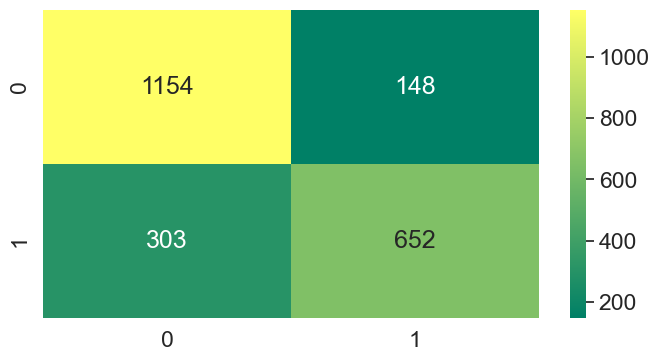

In [147]:
LogesticReg_CounetrVectorizer=LogisticRegression()
model_prediction(LogesticReg_CounetrVectorizer)

Accuracy_Score of RandomForestClassifier model on Training Data is: 98.86018237082067
Accuracy_Score of RandomForestClassifier model on Testing Data is: 79.04297740363315

------------------------------------------------------------------------
Precision Score of RandomForestClassifier model is: 0.8310439560439561
Recall Score of RandomForestClassifier model is: 0.6335078534031413
F1 Score of RandomForestClassifier model is: 0.718954248366013

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier model is:


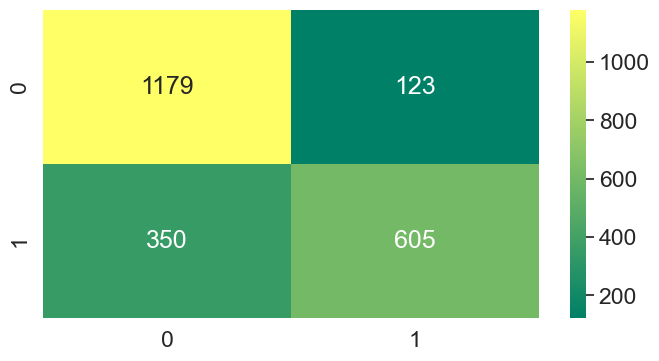

In [148]:
RandomForset_CounterVectorizer=RandomForestClassifier(n_estimators=100)
model_prediction(RandomForset_CounterVectorizer)

Accuracy_Score of MultinomialNB model on Training Data is: 90.99544072948328
Accuracy_Score of MultinomialNB model on Testing Data is: 80.94816127603013

------------------------------------------------------------------------
Precision Score of MultinomialNB model is: 0.7959413754227734
Recall Score of MultinomialNB model is: 0.7392670157068063
F1 Score of MultinomialNB model is: 0.7665580890336591

------------------------------------------------------------------------
Confusion Matrix of MultinomialNB model is:


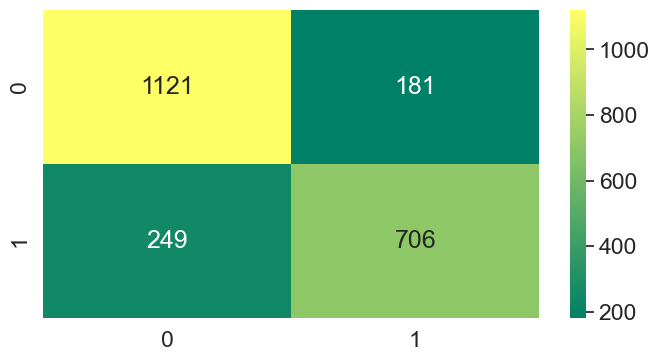

In [149]:
Gussian_CounterVectorizer=MultinomialNB()
model_prediction(Gussian_CounterVectorizer)

Accuracy_Score of SVC model on Training Data is: 94.68085106382979
Accuracy_Score of SVC model on Testing Data is: 80.81524147097917

------------------------------------------------------------------------
Precision Score of SVC model is: 0.8728571428571429
Recall Score of SVC model is: 0.6397905759162303
F1 Score of SVC model is: 0.738368580060423

------------------------------------------------------------------------
Confusion Matrix of SVC model is:


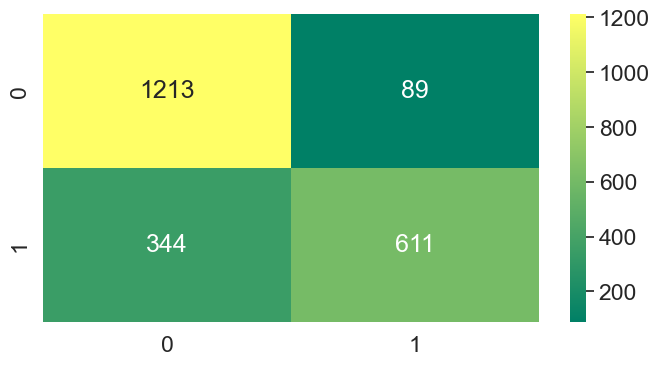

In [150]:
SVC_CounterVectorizer=SVC()
model_prediction(SVC_CounterVectorizer)

Accuracy_Score of XGBClassifier model on Training Data is: 83.41565349544074
Accuracy_Score of XGBClassifier model on Testing Data is: 78.33407177669473

------------------------------------------------------------------------
Precision Score of XGBClassifier model is: 0.8357348703170029
Recall Score of XGBClassifier model is: 0.6073298429319371
F1 Score of XGBClassifier model is: 0.703456640388114

------------------------------------------------------------------------
Confusion Matrix of XGBClassifier model is:


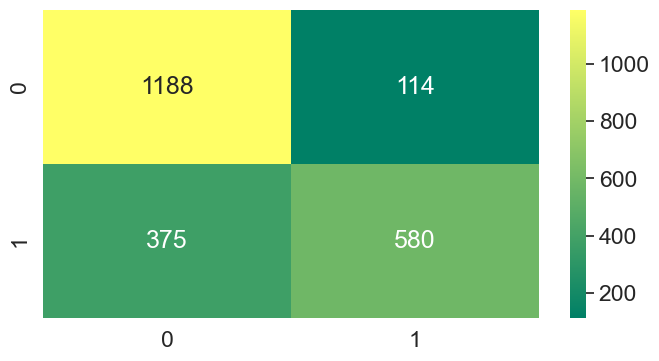

In [151]:
XGB_CounterVectorizer=XGBClassifier()
model_prediction(XGB_CounterVectorizer)

### Observing all models Performance for CounterVectorizer

In [152]:
models_vectorizer = ["Logistic Regression","Random Forest","Naive Bayes","SVM"
          ,"XGBoost"]

In [153]:
df_vectorizer = pd.DataFrame({"Algorithms":models_vectorizer,
                   "Training Score":training_score_vectorizer,
                   "Testing Score":testing_score_vectorizer})

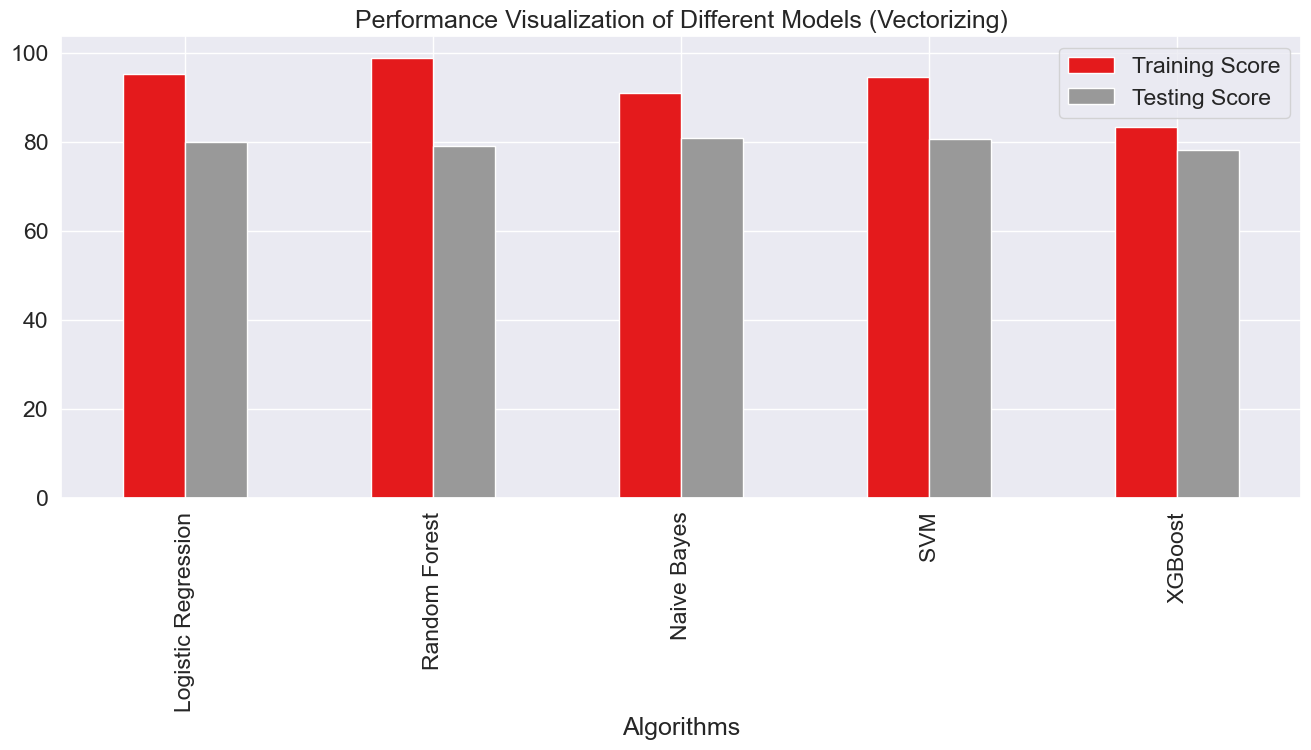

In [154]:
df_vectorizer.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models (Vectorizing)",colormap="Set1")
plt.show()

In [155]:
training_score_tf =[]
testing_score_tf =[]

def model_prediction_tf(model):
    model.fit(X_train_tf,y_train_tf)
    x_train_pred = model.predict(X_train_tf)
    x_test_pred = model.predict(X_test_tf)
    a = accuracy_score(y_train_tf,x_train_pred)*100
    b = accuracy_score(y_test_tf,x_test_pred)*100
    training_score_tf.append(a)
    testing_score_tf.append(b)
    model_name = str(model).split('(')[0]
    print(f"Accuracy_Score of {model_name} model on Training Data is:",a)
    print(f"Accuracy_Score of {model_name} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model_name} model is:",precision_score(y_test_tf,x_test_pred))
    print(f"Recall Score of {model_name} model is:",recall_score(y_test_tf,x_test_pred))
    print(f"F1 Score of {model_name} model is:",f1_score(y_test_tf,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model_name} model is:")
    cm = confusion_matrix(y_test_tf,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of LogisticRegression model on Training Data is: 90.91714665485158
Accuracy_Score of LogisticRegression model on Testing Data is: 77.35562310030394

------------------------------------------------------------------------
Precision Score of LogisticRegression model is: 0.8537074148296593
Recall Score of LogisticRegression model is: 0.567747667703243
F1 Score of LogisticRegression model is: 0.6819637139807898

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression model is:


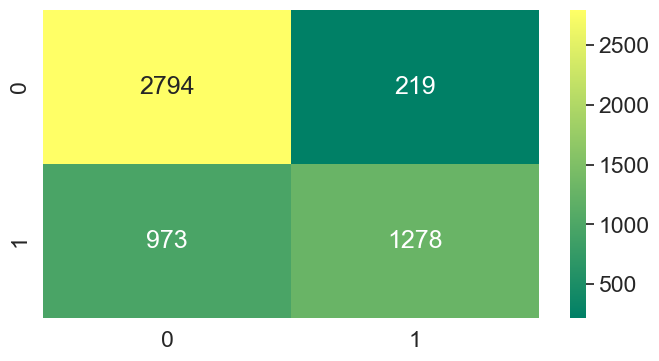

In [156]:
LogesticReg_tf=LogisticRegression()
model_prediction_tf(LogesticReg_tf)

Accuracy_Score of RandomForestClassifier model on Training Data is: 98.89233495790873
Accuracy_Score of RandomForestClassifier model on Testing Data is: 75.2659574468085

------------------------------------------------------------------------
Precision Score of RandomForestClassifier model is: 0.8165443629086058
Recall Score of RandomForestClassifier model is: 0.543758329631275
F1 Score of RandomForestClassifier model is: 0.6527999999999999

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier model is:


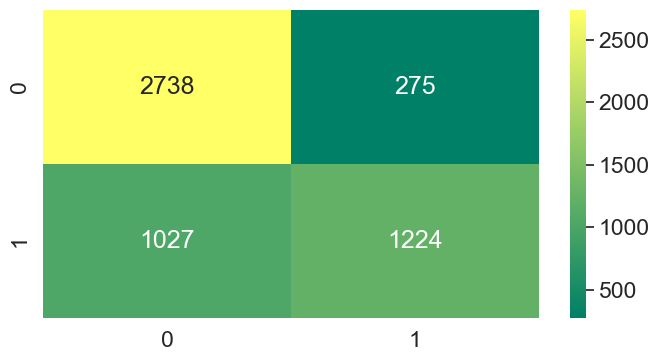

In [157]:
RandomForset_tf=RandomForestClassifier(n_estimators=100)
model_prediction_tf(RandomForset_tf)

Accuracy_Score of MultinomialNB model on Training Data is: 90.03101462117856
Accuracy_Score of MultinomialNB model on Testing Data is: 77.45060790273556

------------------------------------------------------------------------
Precision Score of MultinomialNB model is: 0.8609226594301221
Recall Score of MultinomialNB model is: 0.5637494446912483
F1 Score of MultinomialNB model is: 0.6813422818791947

------------------------------------------------------------------------
Confusion Matrix of MultinomialNB model is:


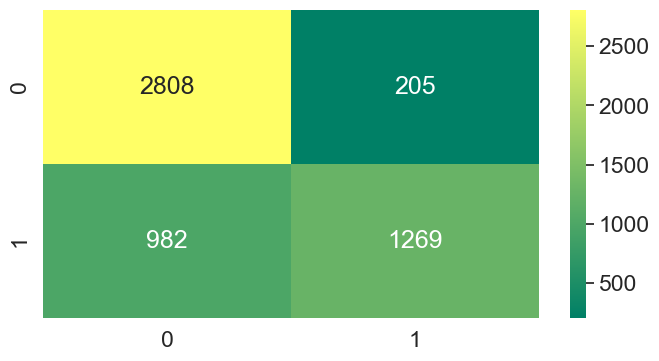

In [158]:
Gussian_tf=MultinomialNB()
model_prediction_tf(Gussian_tf)

Accuracy_Score of SVC model on Training Data is: 97.7403633141338
Accuracy_Score of SVC model on Testing Data is: 76.709726443769

------------------------------------------------------------------------
Precision Score of SVC model is: 0.860661505981703
Recall Score of SVC model is: 0.5433140826299423
F1 Score of SVC model is: 0.6661220043572985

------------------------------------------------------------------------
Confusion Matrix of SVC model is:


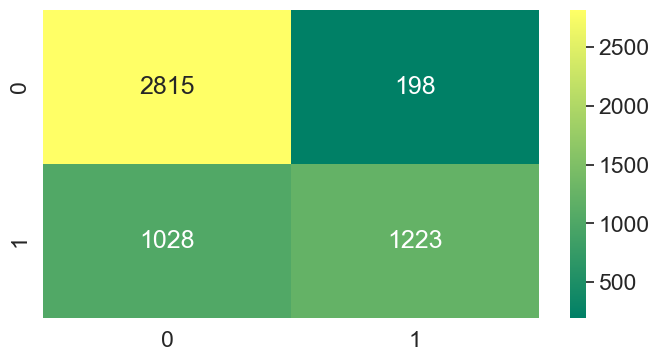

In [159]:
SVC_tf=SVC()
model_prediction_tf(SVC_tf)

Accuracy_Score of XGBClassifier model on Training Data is: 89.41072219760744
Accuracy_Score of XGBClassifier model on Testing Data is: 74.94300911854104

------------------------------------------------------------------------
Precision Score of XGBClassifier model is: 0.7712456344586729
Recall Score of XGBClassifier model is: 0.5886272767658818
F1 Score of XGBClassifier model is: 0.6676744771982867

------------------------------------------------------------------------
Confusion Matrix of XGBClassifier model is:


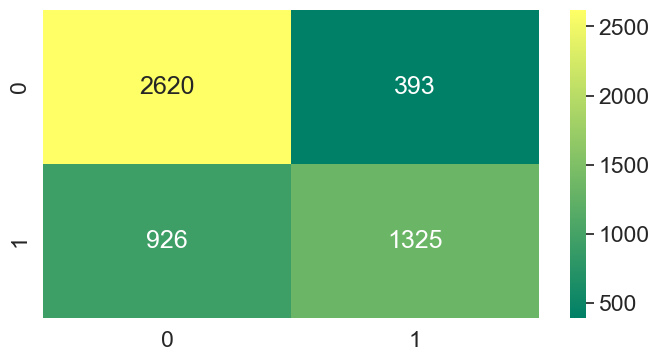

In [160]:
XGB_tf=XGBClassifier()
model_prediction_tf(XGB_tf)

### Observing all models Performance fot TF_IDF

In [161]:
models_tf = ["Logistic Regression","Random Forest","Naive Bayes","SVM"
          ,"XGBoost"]

In [162]:
df_tf = pd.DataFrame({"Algorithms":models_tf,
                   "Training Score":training_score_tf,
                   "Testing Score":testing_score_tf})

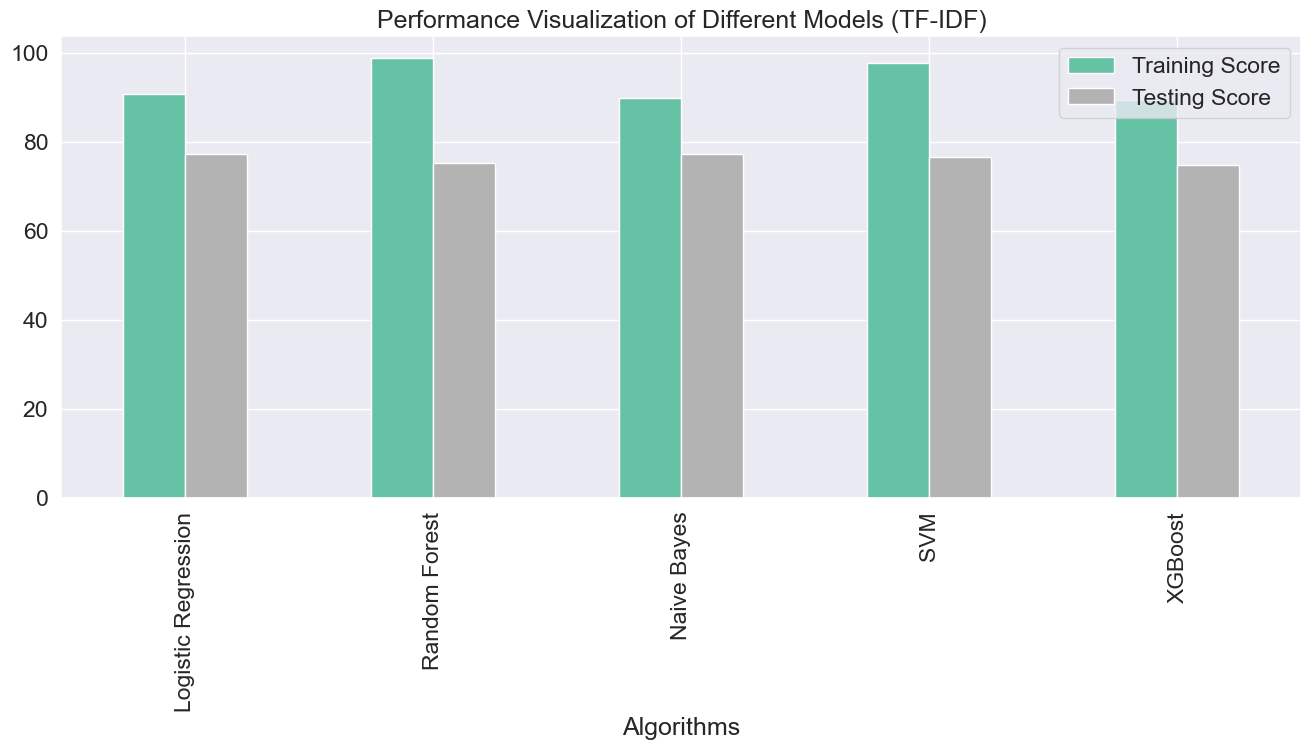

In [163]:
df_tf.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models (TF-IDF)",colormap="Set2")
plt.show()

### Prediction for CounterVectorizer and Saving

In [166]:
Final_Model_CounterVector = SVC_CounterVectorizer.predict(test_vectors)
test_df['target'] = Final_Model_CounterVector 
test_df.to_csv('address1.csv')
test_df.sample(5)

,id,keyword,location,text,target
574,1868,burned,NYC ?? PA,im proud heart play stab cheat burn broken som...,0
348,1127,blew%20up,twitch.tv/dgn_esports,reason player ego caus cod champ that esport b...,0
129,411,apocalypse,Instagram:marissatunis,apocalyps,0
2637,8819,sirens,new jersey,remind dan collab tyler complain siren stop im...,0
1732,5846,hailstorm,"Calgary, Alberta, Canada",yyc hailstorm christma came earli,1


### Prediction for Tf_IDF and Saving

In [167]:
Final_Model_tf = SVC_tf.predict(test_tfidf)
test_df['target'] = Final_Model_tf 
test_df.to_csv('address2.csv')
test_df.sample(5)


,id,keyword,location,text,target
529,1734,buildings%20burning,NaN,forestservic rt dhsscitech firefight run burn ...,0
3159,10480,wild%20fires,NaN,there wild fire us californiaand droughtthi st...,1
242,776,avalanche,KATONG PLAZA #02-10,fc maid agenc present musician kall mattson re...,0
1076,3556,desolate,"Twin Falls, Idaho, 83301",behold hous left desol matthew nasb,0
2885,9545,threat,"San Francisco, CA",remind white american biggest terror threat un...,0
